This is a very simple example of neural network. Its purpose is to approximate an unknown single valued function using a dense deep network.
The user is invited to play with it, modifying:
1. the hidden function
2. the number of layers and neurons per layer
3. activation functions, number of epochs, and so on.

In [1]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

"myhiddenfunction" is the definition of the function you want to approximate by means of a neural network (NN). The definition is hidden to the NN, who can only access it as a blackbox, to get training samples.
This is implemented by means of a generator (a special kind of function), taking in input a number (batchsize) and returning a pair of input output vectors of length batchsize. Each input is a random number in the interval [-pi,pi] and the output is computed by means of myhiddenfunction.

In [2]:
def myhiddenfunction(x):
  #define your favourite function
  #output in range 0-1 if last activation is a sigmoid!
  res = (np.sin(x)**2 + np.cos(x)/3 + 1)/3
  #res = 0.2 + 0.4*x**2 + 0.3*x*np.sin(15*x) + 0.05*np.cos(50*x)
  #if x < -1 or x > 1 : res = 0
  #else: res = 1
  return res

If you have a way to define new samples, you should take advantage of it, exploiting a **generator**.

In python, a generator is similar to a normal function but with a yield statement instead of a return statement.

The difference is that while a "return" statement terminates a function entirely, a "yield" statement pauses the function saving its state and resume from it on successive calls.

In [19]:
def generator(batchsize):
    while True:
      #adjust range according to myhiddentfunction
      inputs = np.random.uniform(low=-np.pi,high=np.pi,size=batchsize)
      #inputs = np.random.uniform(low=0,high=1,size=batchsize)
      outputs = np.zeros(batchsize)
      for i in range(0,batchsize):
          outputs[i] = myhiddenfunction(inputs[i]) # + np.random.normal() *.1
      yield (inputs,outputs)

If you want to see an example of a generated batch, you need to invoke next on the generator

In [5]:
print(next(generator(3)))

(array([2.33794587, 2.34404331, 1.13826947]), array([0.42896085, 0.42644304, 0.65467391]))


As we shall see, we may directly call the generator during the training process.

However, for the moment we use it to create a fixed training set.

In [6]:
x_train, y_train = next(generator(6000))
x_val, y_val = next(generator(1000))

Now we define the network. The function we want to approximate is single valued, so the network will have a single input and a single output, and its (dense) structure is completely defined by a
list specifying the number of neurons per layer


In [13]:
input_layer = Input(shape=(1,))
x = Dense(50,activation='relu')(input_layer)   #20 #50 #100
x = Dense(20, activation='relu')(x)
#x = Dense(50, activation='relu')(x)
output_layer = Dense(1,activation='sigmoid')(x)

mymodel = Model(input_layer,output_layer)

We can now have a look at the model we just generated:

In [14]:
mymodel.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,141 (4.46 KB)

 Trainable params: 1,141 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

Try to be sure you correctly understand the number of learning parameters for each layer.
For a dense layer with n input neurons and m output neurons, your have nxm weights + m biases.
For instance, for a 20-to-30 layer, we have 20x30+30 = 630 parameters.

We are finally ready to compile our model and train it.
As loss function we use mean square error (mse).
The "optimizer" is the technique used to tune the learning rate during backpropagation: you may ignore it for the moment.

In [15]:
mymodel.compile(optimizer='adam', loss='mse')

In [16]:
batchsize = 128
mygen = generator(batchsize)
#mymodel.fit(x_train,y_train,epochs=100,batch_size=batchsize,validation_data=(x_val,y_val))
mymodel.fit(mygen,epochs=50,steps_per_epoch=100)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0174
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0511e-04
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6026e-05
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0920e-05
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2764e-05
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0945e-05
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8232e-06
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4164e-06
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7549e-06
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5705e-06
Epoch 13/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1098e-06
Epoch 14/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2065e-06
Epoch 15/50
1

In [17]:
def plot(f, model):
  x = np.arange(-np.pi,np.pi,0.05)
  #x = np.arange(0,1,0.005)
  y = [f(a) for a in x]
  z = model.predict(np.array(x))
  plt.plot(x,y,'r',x,z,'b')
  plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


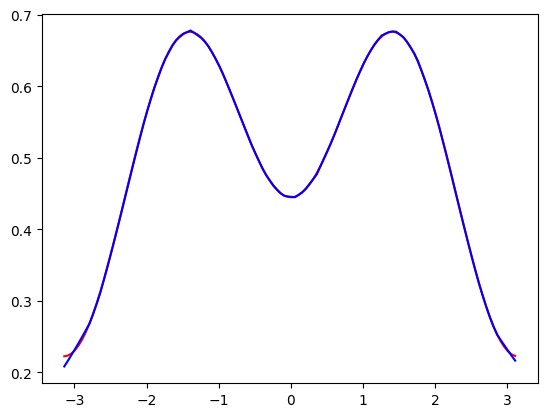

In [18]:
plot(myhiddenfunction,mymodel)

In [ ]:
batchsize = 64

mymodel.fit(generator(batchsize), steps_per_epoch=1000, epochs=10)

W1029 12:28:18.129240 140664400869248 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 1000 steps
Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0120
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0112
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0102
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0094
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0088
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0081
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0079
Epoch 8/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0076
Epoch 9/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0070
Epoch 10/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0069


If everything is working correctly, the loss should decrease during training.  
If it doesn't, it means that, for some reason, the network is not learning.

We are finally ready to check the result of the approximation. We plot the hidden function in red,
and the approximation computed by the network in blu.

In [ ]:
x = np.arange(-np.pi,np.pi,0.05)
y = [myhiddenfunction(a) for a in x]
z = mymodel.predict(np.array(x))
plt.plot(x,y,'r',x,z,'b')
plt.show()


Now is your turn. Modify:

1. the definition of the hidden function
2. the number of layers/neurons per layer; you just have to change inner_layers_dims in block 6.

Have fun.